# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features

| Feature | definition |
| -------- | -------- |
| Id: | A unique identifier for each employee. |
| EmployeeName: | The name of the employee. |
| JobTitle: | The job title of the employee. |
| BasePay: | The base salary of the employee. |
| OvertimePay: | The amount of overtime pay the employee received. |
| OtherPay: | The amount of other pay the employee received. |
| Benefits: | The total benefits the employee received. |
| TotalPay: | The total pay the employee received, including base pay, overtime pay, and other pay. |
| TotalPayBenefits: | The total pay and benefits the employee received. |
| Year: | The year in which the salary information was collected. |
| Notes: | Additional notes about the employee or their salary. |
| Agency: | The agency that the employee works for. |
| Status | |


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [139]:
import pandas as pd
import numpy as np

# Load your dataset
data: pd.DataFrame = pd.read_csv('Salaries.csv')
data.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [140]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

## Data Exploration

In [141]:
# Check for missing values in each column
missing_values = data.isnull().sum()

print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

print("Number of missing values and its percentage in each column:")
print(pd.concat([data.dtypes, missing_values, missing_values/data.shape[0]], axis=1))

Number of rows:  148654
Number of columns:  13
Number of missing values and its percentage in each column:
                        0       1         2
Id                  int64       0  0.000000
EmployeeName       object       0  0.000000
JobTitle           object       0  0.000000
BasePay           float64     609  0.004097
OvertimePay       float64       4  0.000027
OtherPay          float64       4  0.000027
Benefits          float64   36163  0.243270
TotalPay          float64       0  0.000000
TotalPayBenefits  float64       0  0.000000
Year                int64       0  0.000000
Notes             float64  148654  1.000000
Agency             object       0  0.000000
Status            float64  148654  1.000000


In [142]:
print("Notes and Status are empty columns, let's get rid of them")
data.drop(['Notes', 'Status'], axis=1, inplace=True)
data.columns

Notes and Status are empty columns, let's get rid of them


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [143]:
print("Ensuring that the Id column is valid")
print("duplicates: ", data["Id"].duplicated().sum())
print("na values: ", data["Id"].isna().sum())
print("min, max, range: ", data["Id"].min(),", " , data["Id"].max(),", " , data["Id"].max() - data["Id"].min())

Ensuring that the Id column is valid
duplicates:  0
na values:  0
min, max, range:  1 ,  148654 ,  148653


In [144]:
numerical: list[str] = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']
categorical: list[str] = ['EmployeeName', 'JobTitle', 'Agency']

In [145]:
data[categorical] = data[categorical].astype('category')

## Descriptive Statistics

In [146]:
print("Numerical columns")
# print("Values Range: ")
# print(data[numerical].max()- data[numerical].min())
print("Statistical Description:")
data[numerical].describe()

Numerical columns
Statistical Description:


,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


The average BasePay is $66,325.45, while the average Benefits is $25,007.89. The average TotalPay is $74,768.32, and the average TotalPayBenefits is $93,692.55. The table also shows that the highest BasePay is $319,275.01, while the highest TotalPay is $567,595.43. The lowest BasePay is -$166.01, while the lowest TotalPay is -$618.13. The data in the table is from the years 2011-2014.

In [147]:
print("invalid values for pay and benefits:")
(data[numerical] < 0).sum()

invalid values for pay and benefits:


BasePay             11
OvertimePay          1
OtherPay             5
Benefits             4
TotalPay             1
TotalPayBenefits     4
Year                 0
dtype: int64

In [148]:
print("The mode for numerical columns: ")
print(data.mode(0, numeric_only= True).iloc[0,:])

The mode for numerical columns: 


Id                     1.00
BasePay                0.00
OvertimePay            0.00
OtherPay               0.00
Benefits               0.00
TotalPay               0.00
TotalPayBenefits    7959.18
Year                2014.00
Name: 0, dtype: float64


In [149]:
data[categorical].describe()

,EmployeeName,JobTitle,Agency
count,148654,148654,148654
unique,110811,2159,1
top,Kevin Lee,Transit Operator,San Francisco
freq,13,7036,148654


Note: All employees' Agency is San Francisco

In [150]:
print("Number of duplicated rows:")
print(data.duplicated().sum())

# Find the number of duplicated values in each column
duplicates: pd.DataFrame = data.apply(lambda x: x.duplicated().sum())

# Print the number of duplicated values in each column
print("Number of duplicated values in each column:")
print(pd.concat([duplicates, duplicates/data.shape[0]], axis=1))

Number of duplicated rows:
0
Number of duplicated values in each column:
                       0         1
Id                     0  0.000000
EmployeeName       37843  0.254571
JobTitle          146495  0.985476
BasePay            39164  0.263457
OvertimePay        82655  0.556023
OtherPay           65428  0.440136
Benefits           50188  0.337616
TotalPay           10168  0.068400
TotalPayBenefits    6556  0.044102
Year              148650  0.999973
Agency            148653  0.999993


## Data Cleaning

### Dealing with missing values

| Feature | dtype | missing values | percentage |
| -------- | -------- | -------- | -------- |
| BasePay     | float64 |   609 | 0.004097 |
| OvertimePay | float64 |     4 | 0.000027 |
| OtherPay    | float64 |     4 | 0.000027 |
| Benefits    | float64 | 36163 | 0.243270 |


BasePay, OvertimePay and OtherPay have very very low missing values frequency so it doesn't matter to drop them or filling them with a method which I chose to be the median for BasePay and 0 for OtherPay and OvertimePay.

In [151]:
print("Filling the missing values of low frequency with their median")
data['BasePay'].fillna(data['BasePay'].median(), inplace=True)
data['OvertimePay'].fillna(0, inplace=True)
data['OtherPay'].fillna(0, inplace=True)

Filling the missing values of low frequency with their median


For Benefits column, Logically when benefits info does not exist maybe that means there is no benefits (it's zero).
But let's test that before by verifying data integrity.

In [152]:
data_nato0: pd.DataFrame = data[numerical].fillna(0)
print("TotalPay + Benefits != TotalPayBenefits:")
print(((data_nato0["BasePay"] + data_nato0["OvertimePay"] + data_nato0["OtherPay"] + data_nato0["Benefits"] - data_nato0["TotalPayBenefits"]).abs() > 0.0000001).sum(), "/", data_nato0.shape[0])
print("BasePay + OvertimePay + OtherPay + Benefits != TotalPayBenefits:")
print(((data_nato0["TotalPay"] + data_nato0["Benefits"] - data_nato0["TotalPayBenefits"]).abs() > 0.0000001).sum(), "/", data_nato0.shape[0])

TotalPay + Benefits != TotalPayBenefits:
609 / 148654
BasePay + OvertimePay + OtherPay + Benefits != TotalPayBenefits:
0 / 148654


These results are not coincidences... so I will adopt filling zeros for none defined benifits values.

In [153]:
data['Benefits'].fillna(0, inplace=True)

### Dealing with invalid numerical values

Pay > 0

| BasePay	| OvertimePay	| OtherPay	| Benefits	| TotalPay	| TotalPayBenefits	| Year |
| -------- | -------- | -------- | -------- | -------- | -------- | -------- |
| 11 | 1 | 5 | 4 | 1 | 4 | 0 | 

They have very very very low frequency so I'll drop them

In [154]:
_rows_count: int = data.shape[0]
data.drop(index=data[(data[numerical] < 0).any(axis=1)].index, inplace=True)
print("dropped rows:", _rows_count - data.shape[0])

dropped rows: 21


Data integrity
- BasePay + OvertimePay + OtherPay = TotalPay
- BasePay + OvertimePay + OtherPay + Benefits = TotalPayBenefits
- TotalPay + Benefits = TotalPayBenefits

In [155]:
print("rows count:")
print(data.shape[0])
print("BasePay + OvertimePay + OtherPay != TotalPay:")
print(((data["BasePay"] + data["OvertimePay"] + data["OtherPay"] - data["TotalPay"]).abs() > 0.000000001).sum())
print("BasePay + OvertimePay + OtherPay + Benefits != TotalPayBenefits:")
print(((data["BasePay"] + data["OvertimePay"] + data["OtherPay"] + data["Benefits"] - data["TotalPayBenefits"]).abs() > 0.000000001).sum())
print("TotalPay + Benefits != TotalPayBenefits:")
print(((data["TotalPay"] + data["Benefits"] - data["TotalPayBenefits"] > 0.000000001).abs()).sum())

rows count:
148633
BasePay + OvertimePay + OtherPay != TotalPay:
606
BasePay + OvertimePay + OtherPay + Benefits != TotalPayBenefits:
606
TotalPay + Benefits != TotalPayBenefits:
0


In [156]:
_rows_count: int = data.shape[0]
data.drop(index=data[((data["BasePay"] + data["OvertimePay"] + data["OtherPay"] - data["TotalPay"]).abs() > 0.000000001)].index, inplace=True)
print("dropped rows:", _rows_count - data.shape[0])
print("BasePay + OvertimePay + OtherPay != TotalPay:")
print(((data["BasePay"] + data["OvertimePay"] + data["OtherPay"] - data["TotalPay"]).abs() > 0.000000001).sum())
print("BasePay + OvertimePay + OtherPay + Benefits != TotalPayBenefits:")
print(((data["BasePay"] + data["OvertimePay"] + data["OtherPay"] + data["Benefits"] - data["TotalPayBenefits"]).abs() > 0.000000001).sum())
print("TotalPay + Benefits != TotalPayBenefits:")
print(((data["TotalPay"] + data["Benefits"] - data["TotalPayBenefits"] > 0.000000001).abs()).sum())

dropped rows: 606
BasePay + OvertimePay + OtherPay != TotalPay:
0
BasePay + OvertimePay + OtherPay + Benefits != TotalPayBenefits:
0
TotalPay + Benefits != TotalPayBenefits:
0


## Basic Data Visualization

In [157]:
numerical

['BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year']

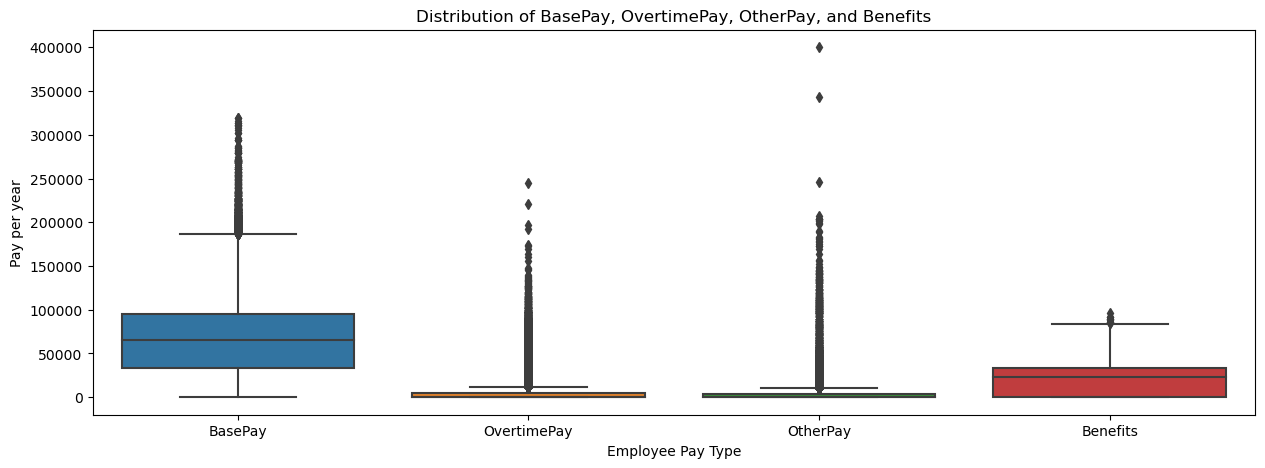

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=data[numerical[:-3]], ax=ax)

ax.set_title('Distribution of BasePay, OvertimePay, OtherPay, and Benefits')
ax.set_xlabel('Employee Pay Type')
ax.set_ylabel('Pay per year')

# plt.subplots_adjust(wspace=0.5)
plt.show()

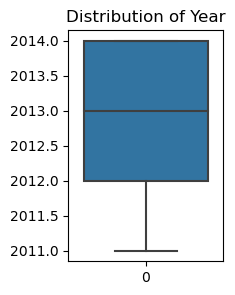

In [159]:
fig, ax = plt.subplots(figsize=(2, 3))
sns.boxplot(data=data['Year'], ax=ax)
ax.set_title('Distribution of Year')
plt.show()

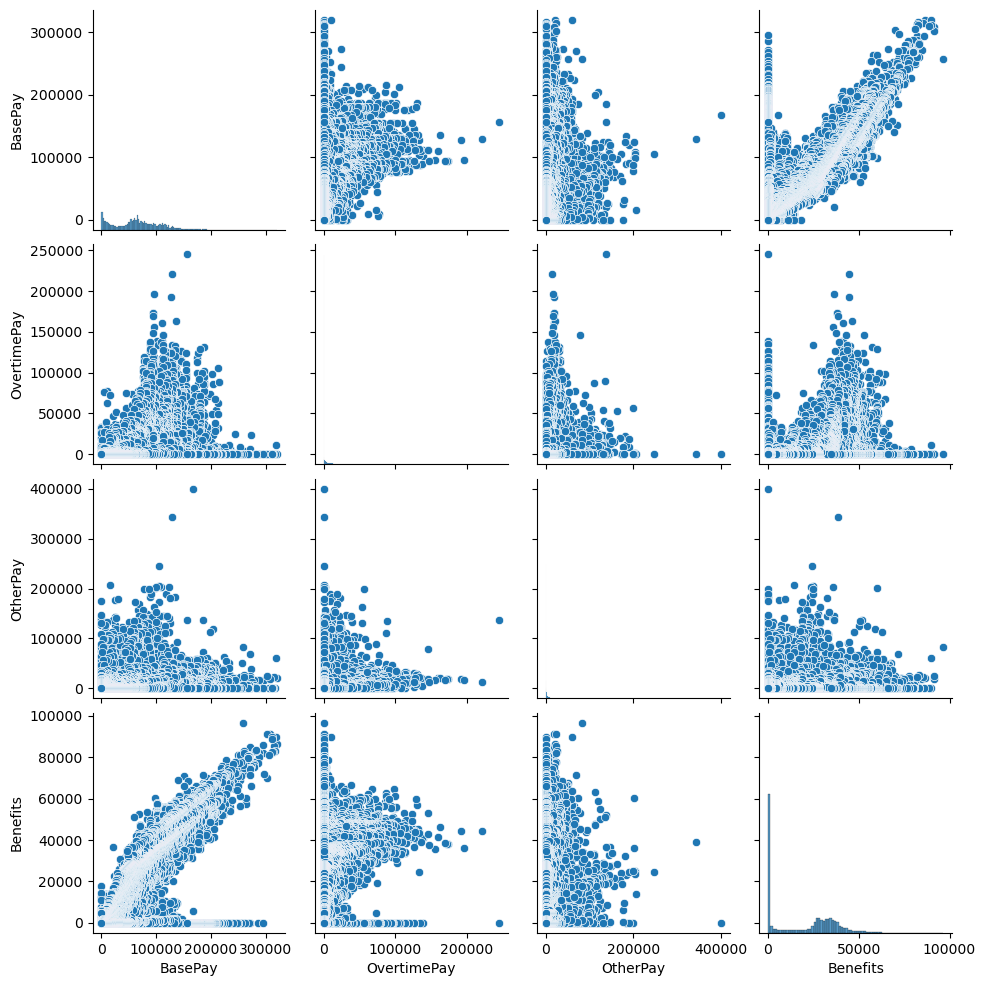

In [160]:
sns.pairplot(data[numerical[:-3]])
plt.show()

linear relation between BasePay and Benefits which means that when your BasePay is more than other then your Benefits is also more.

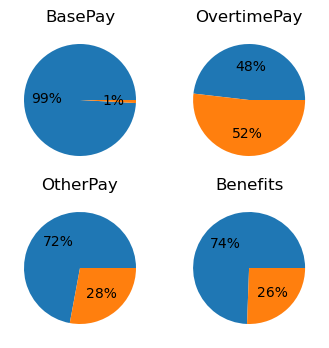

In [161]:
fig, axes = plt.subplots(2,2, figsize=(4,4))
for ax, column in zip(axes.flat, numerical[:-2]):
    ax.pie([(data[column] >= 1).sum(), data.shape[0]-(data[column] >= 1).sum()], autopct='%.0f%%')
    ax.set_title(column)
plt.show()

52% of employees didn't have overtime work and 28% didn't have other pay.
74% of employees have Benefits pay.

In [162]:
categorical

['EmployeeName', 'JobTitle', 'Agency']

In [163]:
data['JobTitle'].value_counts()[(data['JobTitle'].value_counts()>25)].index

CategoricalIndex(['Transit Operator', 'Special Nurse', 'Registered Nurse',
                  'Public Svc Aide-Public Works', 'Police Officer 3',
                  'Custodian', 'TRANSIT OPERATOR', 'Firefighter',
                  'Recreation Leader', 'Patient Care Assistant',
                  ...
                  'Sheriff's Property Keeper', 'ASPHALT WORKER', 'Glazier',
                  'X-RAY LABORATORY AIDE', 'Asphalt Finisher Supervisor 1',
                  'MANAGER VIII', 'Food Service Supervisor',
                  'REAL PROPERTY APPRAISER', 'Sewer Maintenance Worker',
                  'IS Business Analyst-Assistant'],
                 categories=['ACCOUNT CLERK', 'ACCOUNTANT', 'ACCOUNTANT INTERN', 'ACPO,JuvP, Juv Prob (SFERS)', ..., 'X-Ray Laboratory Aide', 'YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS', 'Youth Comm Advisor', 'ZOO CURATOR'], ordered=False, dtype='category', name='JobTitle', length=728)

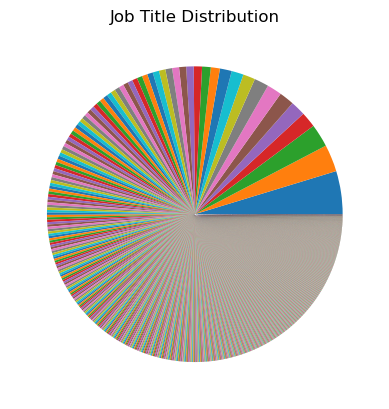

In [164]:
# _ = data['JobTitle'].value_counts()#[(data['JobTitle'].value_counts()>25)]
plt.pie(data['JobTitle'].value_counts(), radius=1)
plt.title("Job Title Distribution")
plt.show()

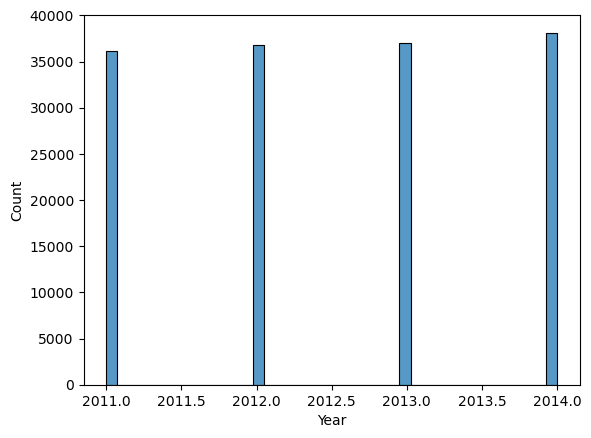

(Year
 2014    38117
 2013    36996
 2012    36755
 2011    36159
 Name: count, dtype: int64,
 array([38117, 36996, 36755, 36159], dtype=int64),
 Index([2014, 2013, 2012, 2011], dtype='int64', name='Year'))

In [165]:
sns.histplot(data=data, x='Year')
plt.show()
data['Year'].value_counts(), data['Year'].value_counts().values, data['Year'].value_counts().index

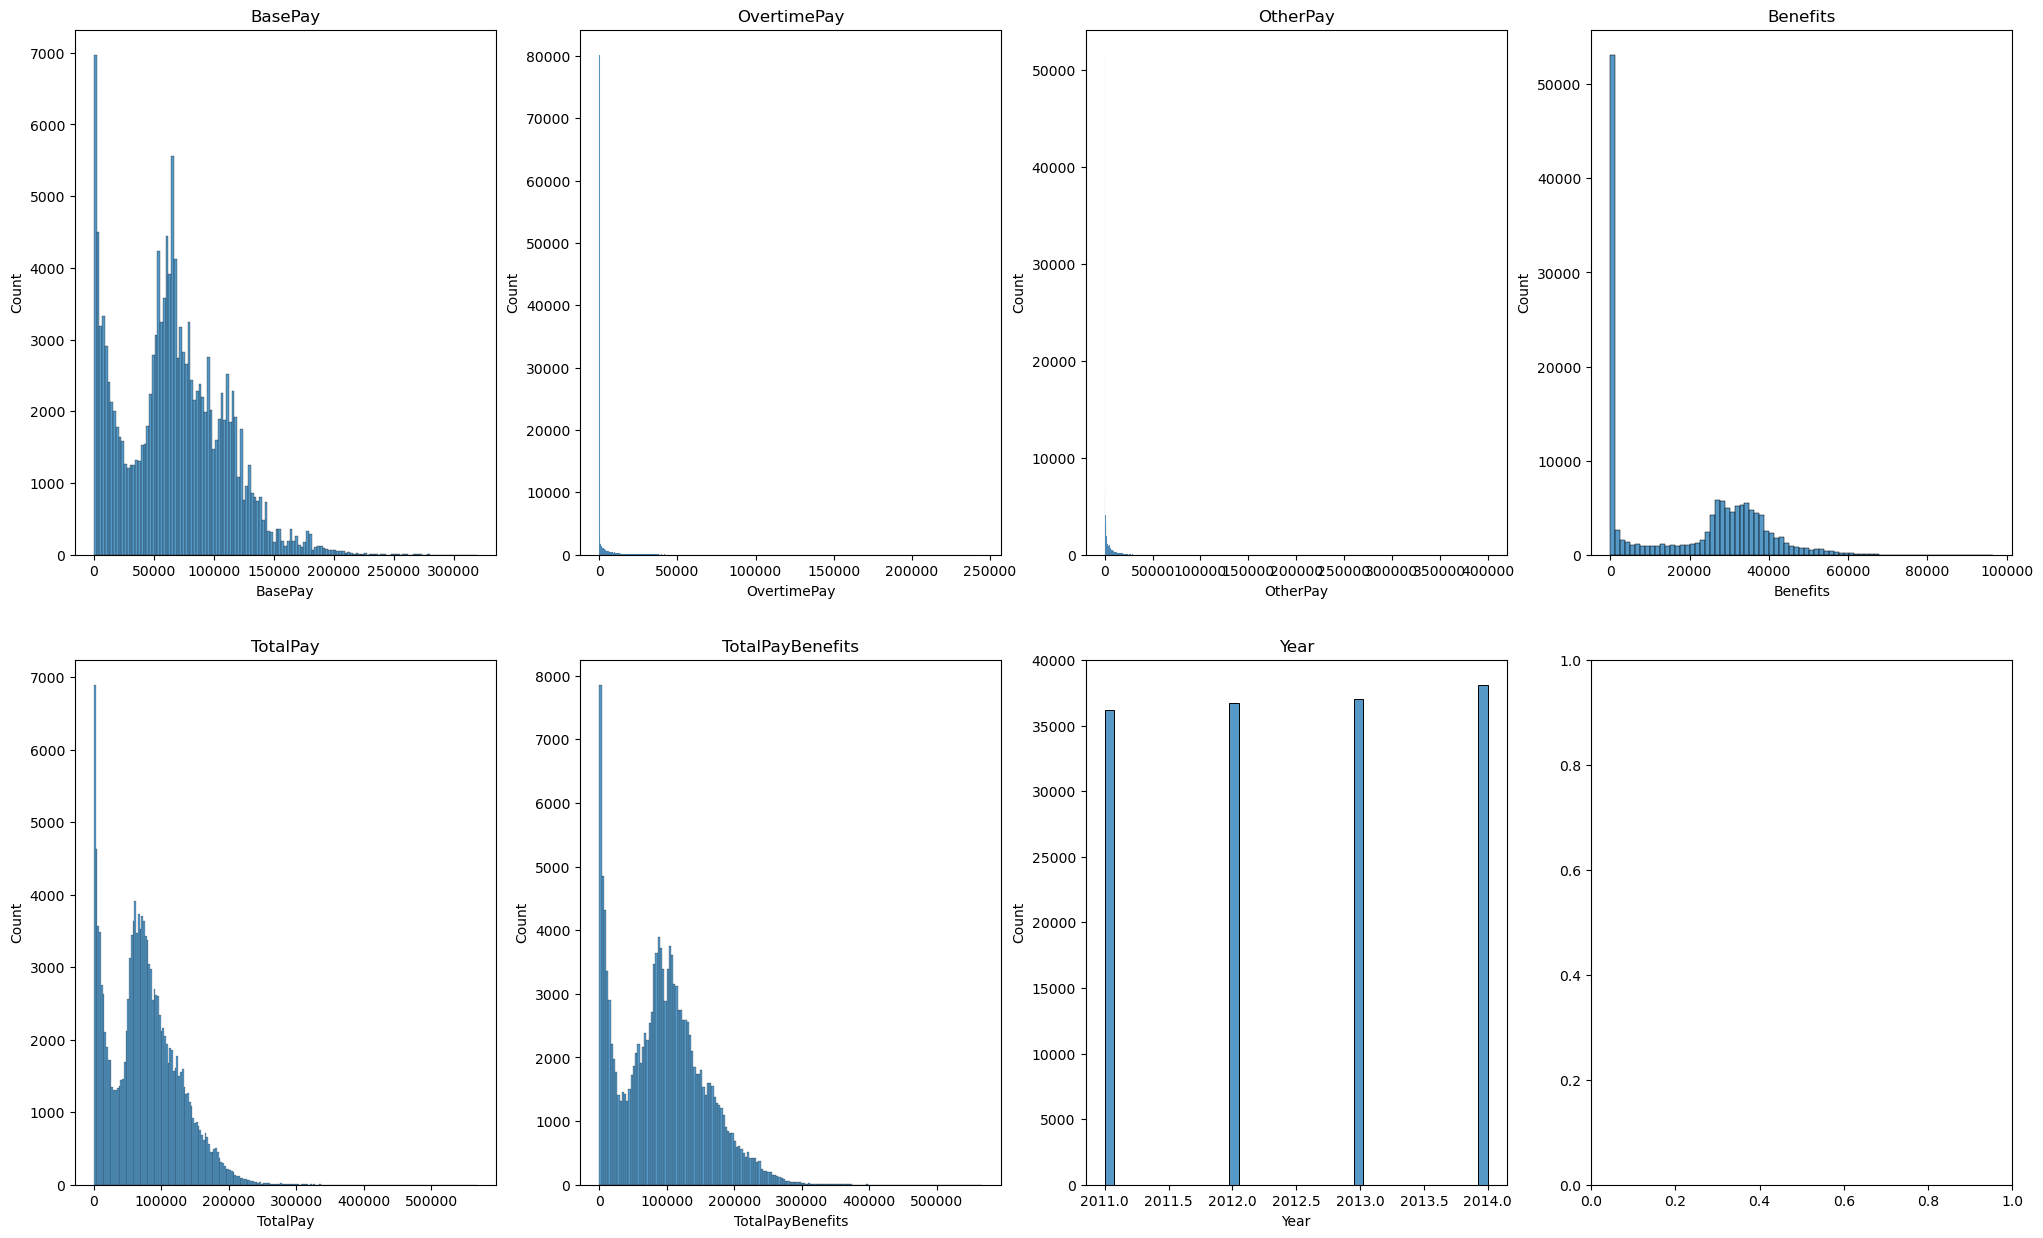

In [166]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))
for ax,column in zip(axes.flat, numerical):
    sns.histplot(data=data, x=column, ax=ax)
    ax.set_title(column)
# sns.histplot(data=data, x='JobTitle', discrete=True, ax=axes[1][3])    
# axes[1][3].set_title("JobTitle")
plt.show()

## Grouped Analysis

In [167]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [168]:
groupbyJobTitle = data.groupby(['JobTitle'])[numerical]

In [169]:
print("Distribution of employee data among job titles:")
print(groupbyJobTitle.count().describe().iloc[:,0])

Distribution of employee data among job titles:
count    2159.000000
mean       68.562761
std       267.649614
min         0.000000
25%         3.000000
50%        12.000000
75%        43.000000
max      6975.000000
Name: BasePay, dtype: float64


Notice: It's normal to the minimum being zero because the JobTitle colum has a category type (not a string) and I dropped some rows lately...

Describe Jobs Total Pay:
count      2154.000000
mean      86448.806638
std       46305.371421
min         149.510000
25%       57989.417005
50%       79476.092065
75%      106703.900417
max      399211.275000
Name: TotalPay, dtype: float64
Histogram of Jobs Total Pay:


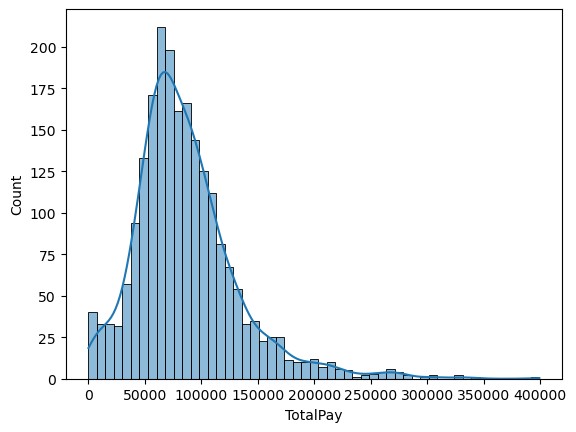

In [170]:
grouped_data: pd.DataFrame = groupbyJobTitle.mean()
print("Describe Jobs Total Pay:")
print(grouped_data['TotalPay'].describe())
print("Histogram of Jobs Total Pay:")
sns.histplot(grouped_data, x='TotalPay', kde=True)
plt.show()

Job Salary      
we can notice that jobs' salaries have almost normal distribution

In [171]:
print("The top ten paid jobs:", grouped_data['TotalPay'].nlargest(10).index.to_list())
print("The worst ten paid jobs:", grouped_data['TotalPay'].nsmallest(10).index.to_list())

The top ten paid jobs: ['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 'Chief Investment Officer', 'Chief of Police', 'Chief, Fire Department', 'DEPUTY DIRECTOR OF INVESTMENTS', 'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)', 'Gen Mgr, Public Trnsp Dept', 'Asst Chf of Dept (Fire Dept)', 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)', 'Dep Dir for Investments, Ret']
The worst ten paid jobs: ['PUBLIC SAFETY COMMUNICATIONS TECHNICIAN', 'BdComm Mbr, Grp2,M=$25/Mtg', 'BOARD/COMMISSION MEMBER, GROUP II', 'BOARD/COMMISSION MEMBER, GROUP III', 'SPECIAL ASSISTANT XIV', 'BdComm Mbr, Grp3,M=$50/Mtg', 'BOARD/COMMISSION MEMBER, GROUP V', 'SPECIAL EXAMINER', 'BdComm Mbr, Grp5,M$100/Mo', 'Commissioner 16.700c, No Pay']


We can use the standard deviation to acknowledge the pay equity for every job title.   
However, for these employee data it's not representetive because almost 25% of job titles have one or two sample for each of them.

Describe Jobs Total Pay:
count      1917.000000
mean      22040.265842
std       16806.858631
min           0.000000
25%       11412.908509
50%       19990.490108
75%       28353.802516
max      238131.155690
Name: TotalPay, dtype: float64
Histogram of Jobs Total Pay:


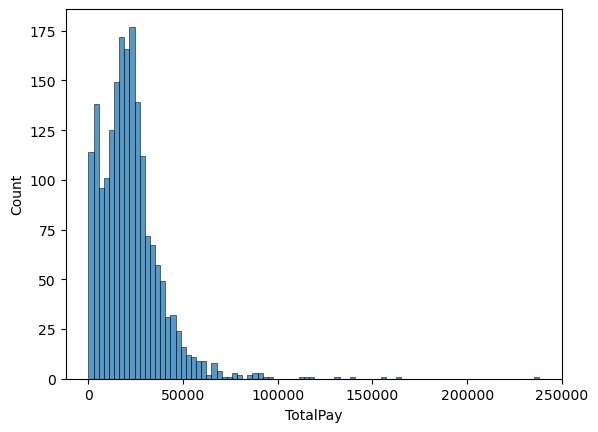

In [172]:
grouped_data: pd.DataFrame = groupbyJobTitle.std()
grouped_data.dropna(inplace=True) # dropping jobs that have only one sample
print("Describe Jobs Total Pay:")
print(grouped_data['TotalPay'].describe())
print("Histogram of Jobs Total Pay:")
sns.histplot(grouped_data, x='TotalPay')
plt.show()

the standard deviation maybe would indicate that the salaries are spread out over a wide range of values.

In [173]:
groupbyYear = data.groupby(['Year'])
grouped_data = groupbyYear[numerical].mean()
grouped_data

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Year,,,,,,,
2011,63595.956517,4531.065429,3617.081926,0.000000,71744.103871,71744.103871,2011.0
2012,65456.016752,5024.881965,3654.530981,26447.878767,74135.429698,100583.308465,2012.0
2013,69631.069053,5368.577324,3811.008327,24131.805491,78810.654705,102942.460196,2013.0
2014,66567.914561,5402.277180,3505.359263,24790.902829,75475.551004,100266.453833,2014.0


There are no benefits in 2011.

The trend of pay components and total pay over the years


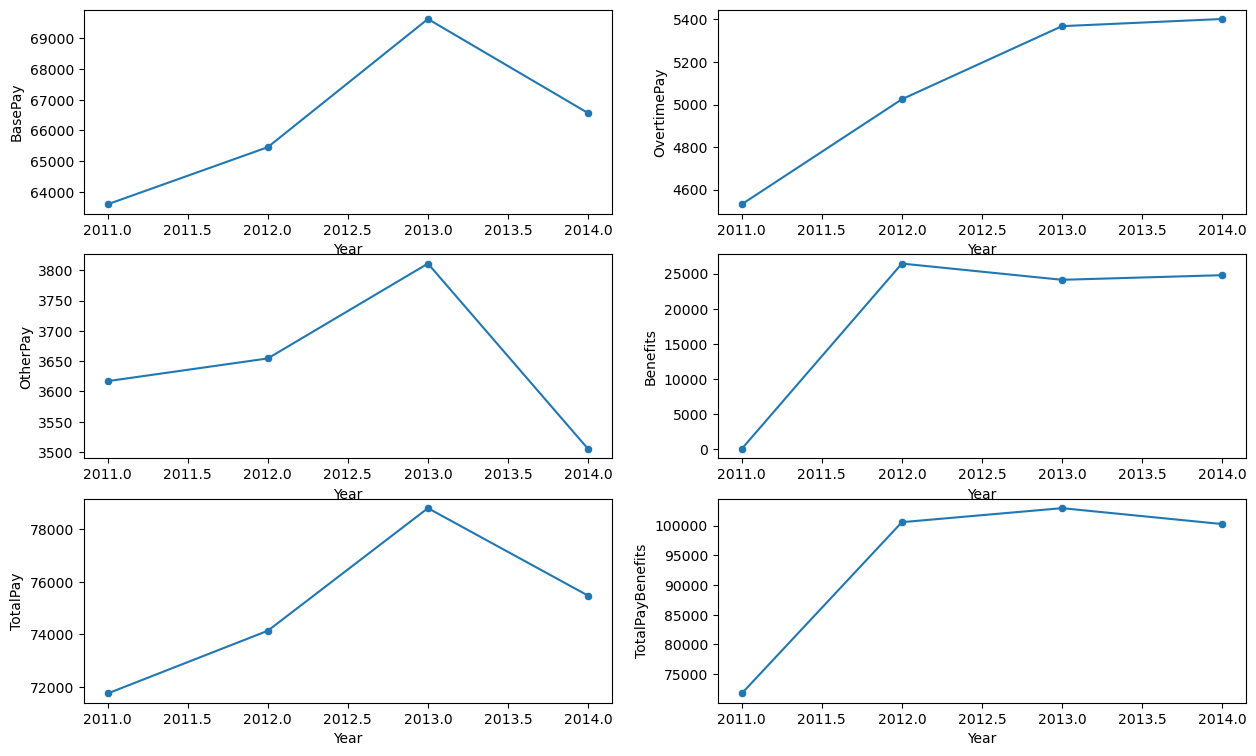

In [174]:
print("The trend of pay components and total pay over the years")
fig, axes = plt.subplots(3, 2, figsize=(15,9))
for ax, column in zip(axes.flat, numerical):
    sns.scatterplot(data=grouped_data, x='Year', y=column, ax=ax)
    sns.lineplot(data=grouped_data, x='Year', y=column, ax=ax)
plt.show()

The plot shows an upward trend from 2011 to 2013, followed by a steep drop in 2014. but TotalPayBenefits didn't affected too much because of Benefits component.

## Simple Correlation Analyses

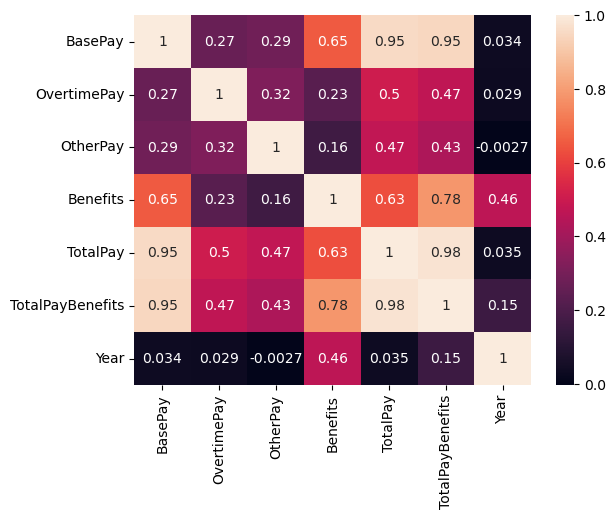

In [175]:
sns.heatmap(data=data[numerical].corr(), annot=True)
plt.show()

TotalPay = BasePay + OvertimePay + OtherPay  
TotalPayBenefits = TotalPay + Benefits

* **BasePay - TotalPay (0.95)**  
employees with higher base pay also tend to have higher total pay.
* **Benefits - BasePay (0.65)**  
employees with higher benefits also tend to have higher base pay then having higher total pay.
* **Year**  
There is no correlations with others unless Benefits because There are no benefits in 2011.  

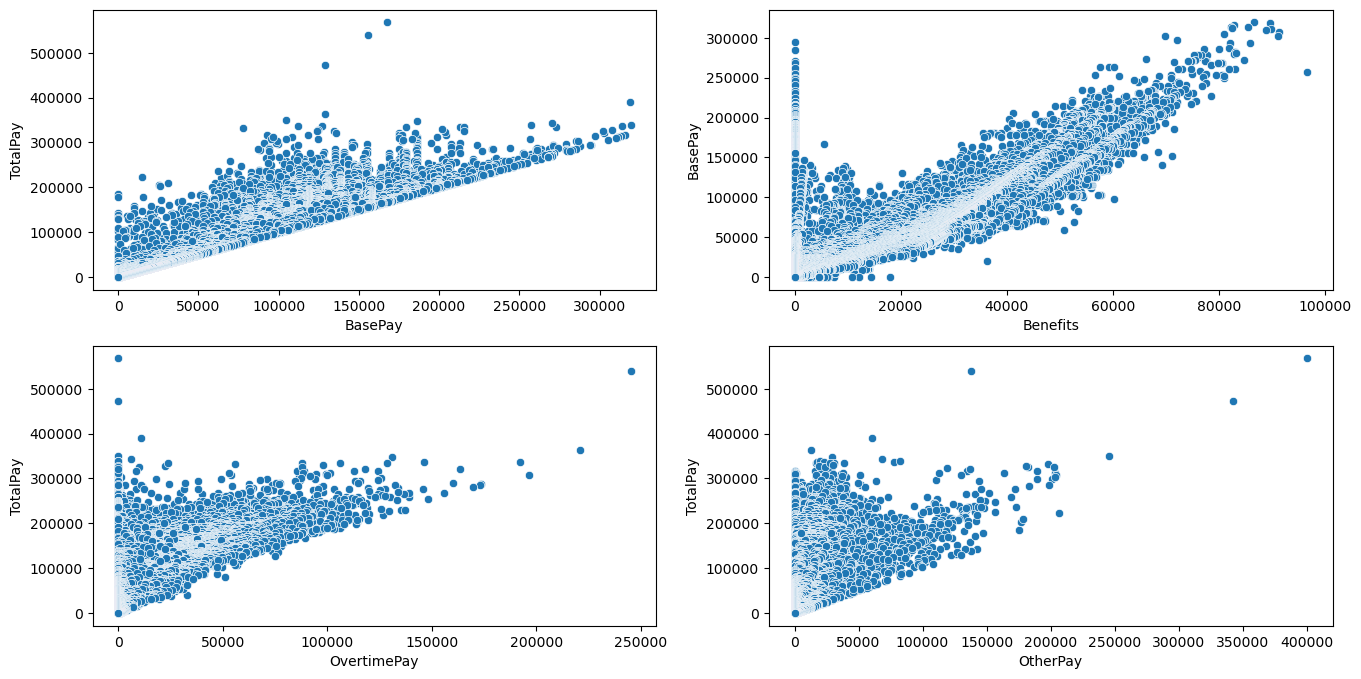

In [176]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(data=data, x='BasePay', y='TotalPay', ax=axes[0][0])
sns.scatterplot(data=data, x='Benefits', y='BasePay', ax=axes[0][1])
sns.scatterplot(data=data, x='OvertimePay', y='TotalPay', ax=axes[1][0])
sns.scatterplot(data=data, x='OtherPay', y='TotalPay', ax=axes[1][1])
plt.show()

TotalPay has naturally correlation with its components (BasePay, OvertimePay, OtherPay). but the most significant component is Base Pay. so employees with higher base pay also tend to have higher total pay. while OvertimePay and OtherPay have a weaker positive correlation.

## Summary of Insights  

The findings and insights from the analysis of a data set on the salaries of employees in **San Francisco** from **2011 to 2014**.  

**Missing Values**

* Notes and Status columns are empty.
* Missing values in pay columns are minimal and can be handled by filling them with the median for BasePay and zeros for OvertimePay and OtherPay.
* Missing values in Benefits column can be assumed to represent zero benefits.

**Average Pay Components**

* Average BasePay: $66,325.45
* Average Benefits: $25,007.89
* Average TotalPay: $74,768.32
* Average TotalPayBenefits: $93,692.55

**Top and Worst Paid Jobs**

* **Top 10 Paid Jobs:**
  * GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
  * Chief Investment Officer
  * Chief of Police
  * Chief, Fire Department
  * DEPUTY DIRECTOR OF INVESTMENTS
  * CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
  * Gen Mgr, Public Trnsp Dept
  * Asst Chf of Dept (Fire Dept)
  * DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
  * Dep Dir for Investments, Ret
* **Worst 10 Paid Jobs:**
  * PUBLIC SAFETY COMMUNICATIONS TECHNICIAN
  * BdComm Mbr, Grp2,M=$25/Mtg
  * BOARD/COMMISSION MEMBER, GROUP II
  * BOARD/COMMISSION MEMBER, GROUP III
  * SPECIAL ASSISTANT XIV
  * BdComm Mbr, Grp3,M=$50/Mtg
  * BOARD/COMMISSION MEMBER, GROUP V
  * SPECIAL EXAMINER
  * BdComm Mbr, Grp5,M$100/Mo
  * Commissioner 16.700c, No Pay

**Correlations**

* Strong correlation between TotalPay and BasePay, Benefits.
* BasePay is the most significant component of TotalPay.
* Weaker correlation between TotalPay and OvertimePay, OtherPay.
* Positive correlation between Benefits and TotalPay.
* Possible negative correlation between OtherPay and BasePay, Benefits.

**Other Findings**

* 52% of employees didn't have overtime work and 28% didn't have other pay.
* 74% of employees have Benefits pay.
* Benefits data is missing for 2011.
* There is an upward trend from 2011 to 2013, followed by a steep drop in 2014.
* Some rows were dropped due to missing values or data integrity issues.

# Good Luck!